# Predecir sobrevivientes del titanic

In [57]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [58]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]

![columns](columns.PNG)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Visualizando la data

In [63]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Cuanto más baja era la clase, menos gente sobrevivía

In [64]:
train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


Los hombres morían a un ritmo impresionante. Las mujeres sobrevivieron en su mayoría

In [65]:
train[['Pclass','Sex','Survived']].groupby(['Sex','Pclass'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,Sex,Pclass,Survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


In [66]:
train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending = False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [67]:
train[['Sex', 'Embarked','Survived']].groupby(['Sex', 'Embarked'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,Sex,Embarked,Survived
0,female,C,0.876712
1,female,Q,0.750000
2,female,S,0.689655
3,male,C,0.305263
5,male,S,0.174603
4,male,Q,0.073171


In [68]:
train[['Pclass', 'Embarked','PassengerId']].groupby(['Embarked', 'Pclass'], as_index=False).count().sort_values(by='Embarked', ascending = True)

,Embarked,Pclass,PassengerId
0,C,1,85
1,C,2,17
2,C,3,66
3,Q,1,2
4,Q,2,3
5,Q,3,72
6,S,1,127
7,S,2,164
8,S,3,353


In [69]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [70]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


No es concluyente, pero parece que las familias más grandes tienden a conducir a tasas de supervivencia más bajas.

In [71]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

family_size = train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean()
print(family_size)

'''
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
family_size = train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()
print(family_size)
'''

            Survived
FamilySize          
1           0.303538
2           0.552795
3           0.578431
4           0.724138
5           0.200000
6           0.136364
7           0.333333
8           0.000000
11          0.000000


"\ntrain['FamilySize'] = train['SibSp'] + train['Parch'] + 1\nfamily_size = train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()\nprint(family_size)\n"

In [72]:
train[['FamilySize','Sex', 'Survived']].groupby(['FamilySize','Sex'], as_index=False).mean()

,FamilySize,Sex,Survived
0,1,female,0.785714
1,1,male,0.155718
2,2,female,0.816092
3,2,male,0.243243
4,3,female,0.775510
5,3,male,0.396226
6,4,female,0.842105
7,4,male,0.500000
8,5,female,0.250000
9,5,male,0.000000


<AxesSubplot: xlabel='FamilySize', ylabel='Survived'>

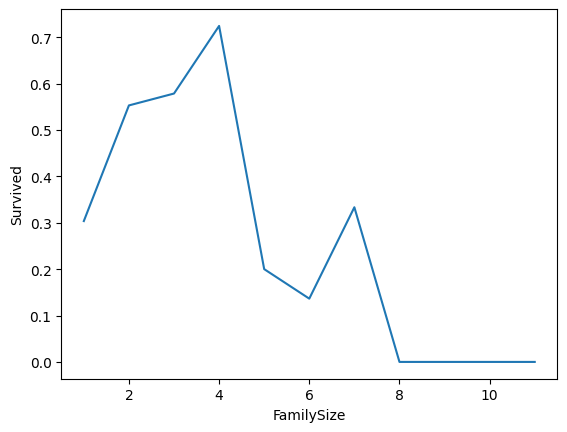

In [73]:
import seaborn as sns
sns.lineplot(data=family_size, x='FamilySize', y='Survived')

In [74]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

print(train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

'''train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
print(train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())'''

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


"train['IsAlone'] = 0\ntrain.loc[train['FamilySize'] == 1, 'IsAlone'] = 1\nprint(train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())"

In [75]:
train[['IsAlone','Sex', 'Survived']].groupby(['IsAlone','Sex'], as_index=False).mean()

,IsAlone,Sex,Survived
0,0,female,0.712766
1,0,male,0.271084
2,1,female,0.785714
3,1,male,0.155718


Aunque IsAlone Feature muestra una buena correlación para los hombres, FamilySize es un mejor indicador de las tasas de supervivencia en general. Los hombres con familia sobrevivieron mucho más que los hombres solos. No hay gran diferencia para las mujeres.

In [76]:
train = train.drop(['Parch', 'SibSp', 'IsAlone'], axis=1)
test = test.drop(['Parch', 'SibSp', 'IsAlone'], axis=1)
combine = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


In [77]:
for dataset in combine:
    dataset['CategoricalAge'] = pd.qcut(train['Age'], 12)

categorical_age = train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean()
print(categorical_age)

    CategoricalAge  Survived
0     (0.419, 9.0]  0.612903
1      (9.0, 18.0]  0.415584
2   (18.0, 20.125]  0.300000
3   (20.125, 23.0]  0.313433
4     (23.0, 25.0]  0.381818
5     (25.0, 28.0]  0.393443
6     (28.0, 31.0]  0.393939
7     (31.0, 34.0]  0.440000
8     (34.0, 38.0]  0.474576
9     (38.0, 44.0]  0.370968
10    (44.0, 51.0]  0.396552
11    (51.0, 80.0]  0.350877


<AxesSubplot: xlabel='CategoricalAge', ylabel='Survived'>

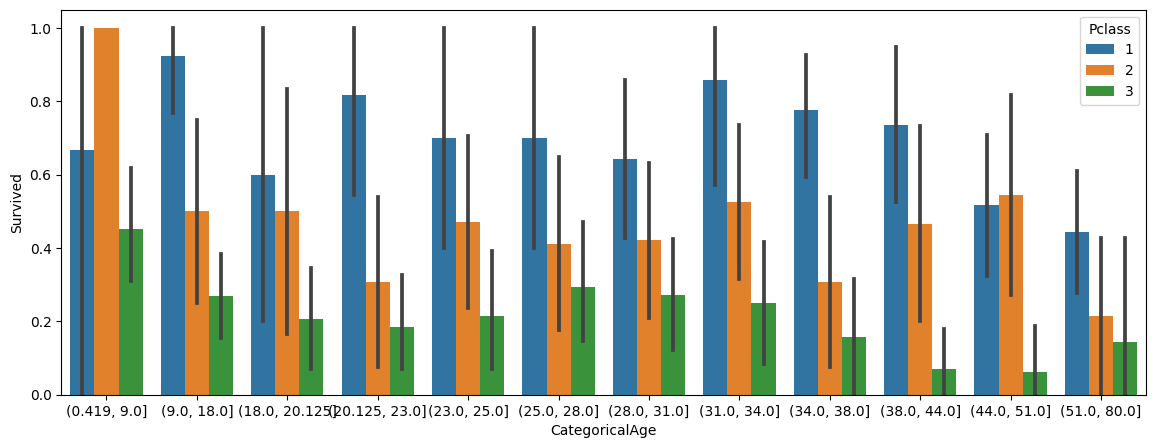

In [78]:
#sns.barplot(data=categorical_age, x='CategoricalAge', y='Survived')
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
sns.barplot(data=train, x='CategoricalAge', y='Survived', hue='Pclass')

In [79]:
train[['CategoricalAge', 'Sex','Survived']].groupby(['Sex', 'CategoricalAge'], as_index=False).mean()

,Sex,CategoricalAge,Survived
0,female,"(0.419, 9.0]",0.633333
1,female,"(9.0, 18.0]",0.710526
2,female,"(18.0, 20.125]",0.777778
3,female,"(20.125, 23.0]",0.750000
4,female,"(23.0, 25.0]",0.761905
5,female,"(25.0, 28.0]",0.722222
6,female,"(28.0, 31.0]",0.730769
7,female,"(31.0, 34.0]",0.928571
8,female,"(34.0, 38.0]",0.904762
9,female,"(38.0, 44.0]",0.708333


Crear función IsKid para niños menores de 9 años

In [80]:
for dataset in combine:
    dataset['IsKid'] = 0
    dataset.loc[dataset['Age'] <= 9, 'IsKid'] = 1

print(train[['IsKid', 'Survived']].groupby(['IsKid'], as_index=False).mean())

   IsKid  Survived
0      0  0.366707
1      1  0.612903


In [81]:
train.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,CategoricalAge,IsKid
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2,"(20.125, 23.0]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2,"(34.0, 38.0]",0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1,"(25.0, 28.0]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2,"(34.0, 38.0]",0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1,"(34.0, 38.0]",0
5,6,0,3,"Moran, Mr. James",male,NaN,330877,8.4583,NaN,Q,1,NaN,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,S,1,"(51.0, 80.0]",0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,349909,21.0750,NaN,S,5,"(0.419, 9.0]",1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,347742,11.1333,NaN,S,3,"(25.0, 28.0]",0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,NaN,C,2,"(9.0, 18.0]",0


<AxesSubplot: xlabel='CategoricalAge', ylabel='Survived'>

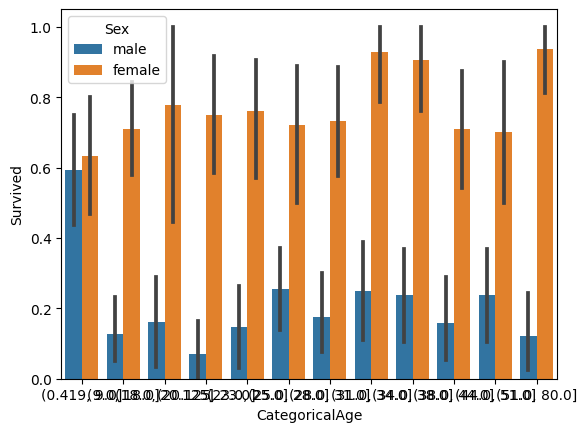

In [82]:
sns.barplot(data=train, x='CategoricalAge', y='Survived', hue='Sex')

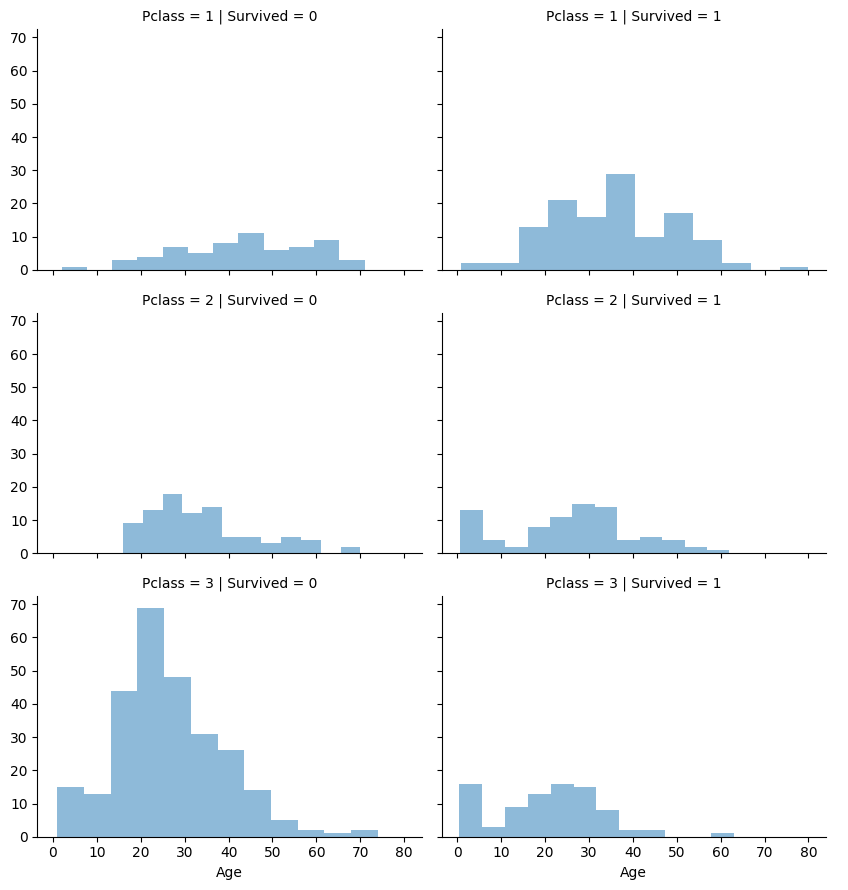

In [83]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', aspect=1.4)
grid.map(plt.hist, 'Age', alpha=.5, bins=12)
grid.add_legend()

Parece que la clase es el factor más importante.

In [84]:
train[['Pclass', 'Sex','Survived']].groupby(['Pclass','Sex'], as_index=False).mean()

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


In [85]:
train[['Pclass','Sex', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


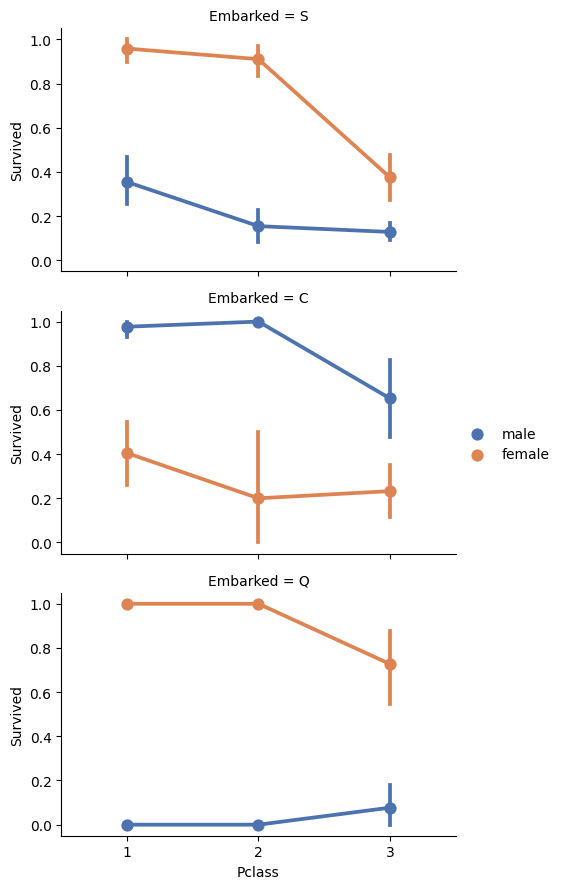

In [86]:
grid = sns.FacetGrid(train, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

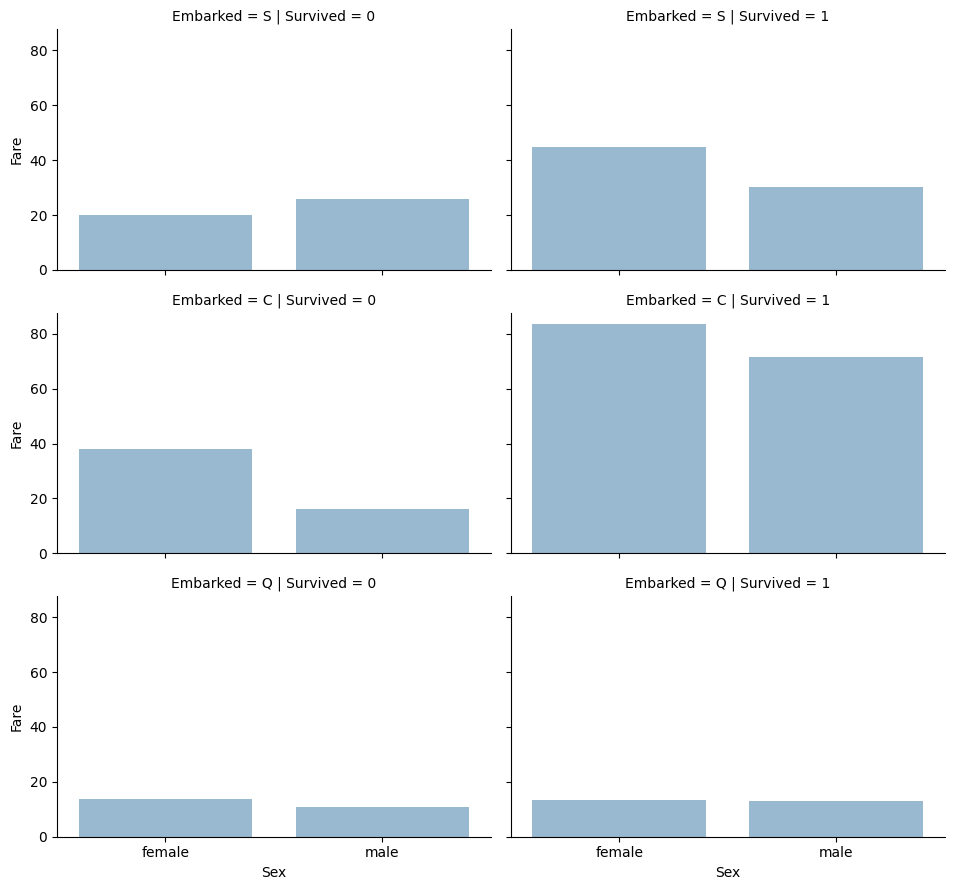

In [87]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [88]:
train[['Sex','Embarked', 'Survived']].groupby(['Sex', 'Embarked'], as_index=False).mean()

,Sex,Embarked,Survived
0,female,C,0.876712
1,female,Q,0.750000
2,female,S,0.689655
3,male,C,0.305263
4,male,Q,0.073171
5,male,S,0.174603


<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

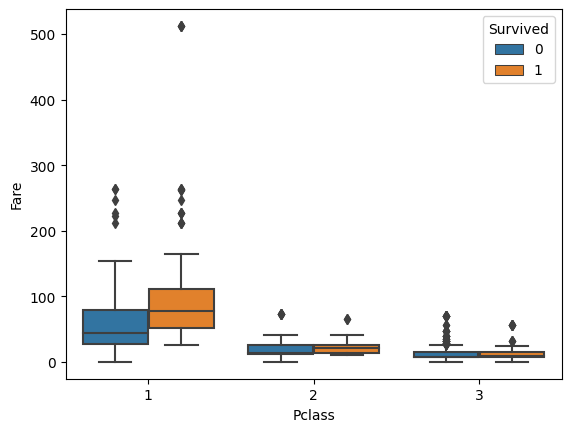

In [89]:
sns.boxplot(data=train, x='Pclass', y='Fare', hue='Survived')

No hay diferencia entre la tarifa pagada y la tasa de supervivencia en las clases más bajas, pero hay una correlación muy leve en la primera clase.

In [90]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [91]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

'''train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')'''
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [92]:
train[['Title', 'Pclass', 'Survived']].groupby(['Title', 'Pclass'], as_index=False).mean()

,Title,Pclass,Survived
0,Master,1,1.000000
1,Master,2,1.000000
2,Master,3,0.392857
3,Miss,1,0.958333
4,Miss,2,0.942857
5,Miss,3,0.500000
6,Mr,1,0.345794
7,Mr,2,0.087912
8,Mr,3,0.112853
9,Mrs,1,0.976744


In [93]:
train.loc[train['Age'].isnull()].groupby(['Title'], as_index=False).count()

,Title,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,CategoricalAge,IsKid
0,Master,4,4,4,4,4,0,4,4,0,4,4,0,4
1,Miss,36,36,36,36,36,0,36,36,2,36,36,0,36
2,Mr,119,119,119,119,119,0,119,119,12,119,119,0,119
3,Mrs,17,17,17,17,17,0,17,17,5,17,17,0,17
4,Rare,1,1,1,1,1,0,1,1,0,1,1,0,1


In [94]:
pd.crosstab(train['Title'], train['CategoricalAge'])

CategoricalAge,"(0.419, 9.0]","(9.0, 18.0]","(18.0, 20.125]","(20.125, 23.0]","(23.0, 25.0]","(25.0, 28.0]","(28.0, 31.0]","(31.0, 34.0]","(34.0, 38.0]","(38.0, 44.0]","(44.0, 51.0]","(51.0, 80.0]"
Title,,,,,,,,,,,,
Master,32,4,0,0,0,0,0,0,0,0,0,0
Miss,30,31,7,20,11,9,14,4,10,5,4,4
Mr,0,35,31,42,34,41,40,35,37,35,34,34
Mrs,0,7,2,4,10,9,12,9,11,19,14,12
Rare,0,0,0,1,0,2,0,2,1,3,6,7


In [95]:
train.groupby(['Title'], as_index=False).count()

,Title,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,CategoricalAge,IsKid
0,Master,40,40,40,40,40,36,40,40,7,40,40,36,40
1,Miss,185,185,185,185,185,149,185,185,49,184,185,149,185
2,Mr,517,517,517,517,517,398,517,517,93,517,517,398,517
3,Mrs,126,126,126,126,126,109,126,126,45,125,126,109,126
4,Rare,23,23,23,23,23,22,23,23,10,23,23,22,23


Tenemos 185 apariciones de "Miss", siendo 149 con la edad y 36 con la función de edad faltante. De esas 149 fallas, 30 son niños (menores de 9 años), aproximadamente el 20 %. Esa cifra será importante cuando corrijamos la función IsKid.

Podemos intentar predecir IsKid usando la función Título. Todos los Maestros son niños y una cantidad proporcional de Misses van a ser niños. Ninguno de los señores, señoras y raros son niños.

Como se muestra arriba, el marco de datos presenta 11 características con una amplia variedad de tipos de datos. Unos son Categóricos y otros numéricos con presencia tanto de valores continuos como discretos. Todas sus descripciones se pueden encontrar en la descripción del conjunto de datos de Kaggle.

A primera vista, parece difícil sacar algo de este conjunto de datos, pero debemos buscar correlaciones entre las características y la tasa de supervivencia. Cuanto antes lo hagamos, más cerca estaremos de predecir correctamente.

Charla sobre Ticket y Cabina  
Pregunta para responder  
**¿Qué características están disponibles en el conjunto de datos?**

**¿Qué características son categóricas?**

**¿Qué características son numéricas?**

**¿Qué características son tipos de datos mixtos?**

**¿Qué características pueden contener errores o errores tipográficos?**

**¿Qué características contienen valores en blanco, nulos o vacíos?**

**¿Cuáles son los tipos de datos para varias funciones?**

**¿Cuál es la distribución de los valores numéricos de las características en las muestras?**

## Preparando la data

In [97]:
print("Before", train.shape, test.shape)#, combine[0].shape, combine[1].shape)

train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

print("After", train.shape, test.shape)#, combine[0].shape, combine[1].shape

Before (891, 14) (418, 13)
After (891, 12) (418, 11)


niño correcto

In [98]:
train.loc[train['Title'] == 'Master']

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,Title
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,21.0750,S,5,"(0.419, 9.0]",1,Master
16,17,0,3,"Rice, Master. Eugene",male,2.00,29.1250,Q,6,"(0.419, 9.0]",1,Master
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,39.6875,S,6,"(0.419, 9.0]",1,Master
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,46.9000,S,8,"(9.0, 18.0]",0,Master
63,64,0,3,"Skoog, Master. Harald",male,4.00,27.9000,S,6,"(0.419, 9.0]",1,Master
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,15.2458,C,3,NaN,0,Master
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,29.0000,S,3,"(0.419, 9.0]",1,Master
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,11.2417,C,2,"(9.0, 18.0]",0,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,69.5500,S,11,NaN,0,Master
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,39.6875,S,6,"(0.419, 9.0]",1,Master


In [99]:
for dataset in combine:
    #missing_age = dataset.loc[dataset['Age'].isnull()]
    dataset.loc[dataset['Title'] == 'Master', 'IsKid'] = 1
    
train.loc[train['Title'] == 'Master']

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,Title
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,21.0750,S,5,"(0.419, 9.0]",1,Master
16,17,0,3,"Rice, Master. Eugene",male,2.00,29.1250,Q,6,"(0.419, 9.0]",1,Master
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,39.6875,S,6,"(0.419, 9.0]",1,Master
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,46.9000,S,8,"(9.0, 18.0]",1,Master
63,64,0,3,"Skoog, Master. Harald",male,4.00,27.9000,S,6,"(0.419, 9.0]",1,Master
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,15.2458,C,3,NaN,1,Master
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,29.0000,S,3,"(0.419, 9.0]",1,Master
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,11.2417,C,2,"(9.0, 18.0]",1,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,69.5500,S,11,NaN,1,Master
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,39.6875,S,6,"(0.419, 9.0]",1,Master


In [100]:
#drop (PassengerId, Name, Age, SibSp, Parch, Ticket, Fare, Cabin, Categorical Age, Title)
#correct IsKid

In [101]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 10), (418, 10))

In [102]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,Title
0,0,3,0,22.0,7.2500,S,2,"(20.125, 23.0]",0,Mr
1,1,1,1,38.0,71.2833,C,2,"(34.0, 38.0]",0,Mrs
2,1,3,1,26.0,7.9250,S,1,"(25.0, 28.0]",0,Miss
3,1,1,1,35.0,53.1000,S,2,"(34.0, 38.0]",0,Mrs
4,0,3,0,35.0,8.0500,S,1,"(34.0, 38.0]",0,Mr


In [105]:
freq_port = train.Embarked.dropna().mode()[0]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,Title
0,0,3,0,22.0,7.2500,S,2,"(20.125, 23.0]",0,Mr
1,1,1,1,38.0,71.2833,C,2,"(34.0, 38.0]",0,Mrs
2,1,3,1,26.0,7.9250,S,1,"(25.0, 28.0]",0,Miss
3,1,1,1,35.0,53.1000,S,2,"(34.0, 38.0]",0,Mrs
4,0,3,0,35.0,8.0500,S,1,"(34.0, 38.0]",0,Mr


In [106]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,Title
0,0,3,0,22.0,7.2500,0,2,"(20.125, 23.0]",0,Mr
1,1,1,1,38.0,71.2833,1,2,"(34.0, 38.0]",0,Mrs
2,1,3,1,26.0,7.9250,0,1,"(25.0, 28.0]",0,Miss
3,1,1,1,35.0,53.1000,0,2,"(34.0, 38.0]",0,Mrs
4,0,3,0,35.0,8.0500,0,1,"(34.0, 38.0]",0,Mr


In [107]:
train = train.drop(['Age', 'Fare', 'CategoricalAge', 'Title'], axis=1)
test = test.drop(['Age', 'Fare', 'CategoricalAge', 'Title'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 6), (418, 6))

In [108]:
train.head()

,Survived,Pclass,Sex,Embarked,FamilySize,IsKid
0,0,3,0,0,2,0
1,1,1,1,1,2,0
2,1,3,1,0,1,0
3,1,1,1,0,2,0
4,0,3,0,0,1,0


In [109]:
test.head()

,PassengerId,Pclass,Sex,Embarked,FamilySize,IsKid
0,892,3,0,2,1,0
1,893,3,1,0,2,0
2,894,2,0,2,1,0
3,895,3,0,0,1,0
4,896,3,1,0,3,0


## Predecir destinos

In [110]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 5), (891,), (418, 5))

In [112]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.48

In [113]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.786104
4,IsKid,2.204630
2,Embarked,0.269317
3,FamilySize,-0.313639
0,Pclass,-1.021171


In [121]:
# Support Vector Machines
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.28

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

78.11

In [124]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

81.48

In [126]:
# Perceptron

from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

80.47

In [128]:
# Linear SVC

from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

81.48

In [131]:
# Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.69

In [133]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

84.85

In [135]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

84.85

## ¿Qué modelo funcionó mejor?

In [136]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.85
8,Decision Tree,84.85
0,Support Vector Machines,83.28
2,Logistic Regression,81.48
4,Naive Bayes,81.48
7,Linear SVC,81.48
5,Perceptron,80.47
6,Stochastic Gradient Decent,79.69
1,KNN,78.11


In [137]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv('submission.csv', index=False)